# **Round 1**

In [2]:
# Starting prices based on seashells
seashells = 1
seashells_to_sillicon_nuggets = 0.64
seashells_to_pizza = 1.98
seashells_to_snowballs = 1.34

# Starting prices based on sillicon nuggets
sillicon_nugets = 1
sillicon_nuggets_to_seashells = 1.49
sillicon_nugets_to_pizza = 3.1
sillicon_nugets_to_snowballs = 1.95

# Starting prices based on pizza
pizza = 1
pizza_to_seashells = 0.48
pizza_to_sillicon_nuggets = 0.31
pizza_to_snowballs = 0.7

# Starting prices based on snowballs
snowballs = 1
snowballs_to_seashells = 0.72
snowballs_to_sillicon_nuggets = 0.52
snowballs_to_pizza = 1.45

In [3]:
graph = {
    'seashells': {'sillicon_nugets': 0.64, 'pizza': 1.98, 'snowballs': 1.34},
    'sillicon_nugets': {'seashells': 1.49, 'pizza': 3.1, 'snowballs': 1.95},
    'pizza': {'seashells': 0.48, 'sillicon_nugets': 0.31, 'snowballs': 0.7},
    'snowballs': {'seashells': 0.72, 'sillicon_nugets': 0.52, 'pizza': 1.45}
    }

In [4]:
from itertools import product

start = 'seashells'
end = 'seashells'
best_path = []
initial_money = 500000
best_profit = 0

for path in product(graph.keys(), repeat=4):
    full_path = [start] + list(path) + [end]
    money = initial_money
    valid = True
    
    for i in range(len(full_path) - 1):
        src, dst = full_path[i], full_path[i+1]
        if dst in graph[src]:
            rate = graph[src][dst]
            money *= rate
        else:
            valid = False
            break
        
    if valid and money > best_profit:
        best_profit = money
        best_path = full_path
        
print(f'Path: {best_path}')
print(f'Money at the end: {best_profit}')
print(f'Profit: {best_profit - initial_money}')
print(f'Percentage Increase: {round(((best_profit - initial_money)/initial_money)*100, 2)}%')

Path: ['seashells', 'snowballs', 'sillicon_nugets', 'pizza', 'snowballs', 'seashells']
Money at the end: 544340.16
Profit: 44340.16000000003
Percentage Increase: 8.87%


In [5]:
# Hardcoded calculation for the best path
initial_money * seashells_to_snowballs * snowballs_to_sillicon_nuggets * sillicon_nugets_to_pizza * pizza_to_snowballs * snowballs_to_seashells

544340.16

### **Results of Manual Trading**

After developing an algorithm that checks all the possible paths, we found the the path that made the highest profit possible. We then used a Bellman-Ford algorithm to be completely sure that the first algorithm created was giving us the best possible path, which it did. 

# **Round 2**

In [6]:
containers = {
    10: 1,
    17: 1,
    20: 2,
    31: 2,
    37: 3,
    50: 4,
    73: 4,
    80: 6,
    89: 8,
    90: 10
}

In [7]:
base_treasure = 10000
containers_values = {}

for multiplier, inhabitants in containers.items():
    total_value = (base_treasure * multiplier)
    containers_values[multiplier] = total_value
    
containers_values = sorted(containers_values.items(), key=lambda x: x[1], reverse=True)

containers_values

[(90, 900000),
 (89, 890000),
 (80, 800000),
 (73, 730000),
 (50, 500000),
 (37, 370000),
 (31, 310000),
 (20, 200000),
 (17, 170000),
 (10, 100000)]

In [8]:
# Assuming no one selects the same container

containers_values_no_picks = {}
containers_values_100_picks = {}

for multiplier, inhabitants in containers.items():
    total_value_no_picks = ((base_treasure * multiplier)/inhabitants)
    containers_values_no_picks[multiplier] = total_value_no_picks
    
    total_value_100_picks = ((base_treasure * multiplier)/(inhabitants + 100))
    containers_values_100_picks[multiplier] = total_value_100_picks
    
    total_value_50_picks = ((base_treasure * multiplier)/(inhabitants + 50))
    containers_values_100_picks[multiplier] = total_value_50_picks
    
containers_values_50_picks = sorted(containers_values_100_picks.items(), key=lambda x: x[1], reverse=True)
containers_values_100_picks = sorted(containers_values_100_picks.items(), key=lambda x: x[1], reverse=True) 
containers_values_no_picks = sorted(containers_values_no_picks.items(), key=lambda x: x[1], reverse=True)

containers_values_no_picks

[(73, 182500.0),
 (17, 170000.0),
 (31, 155000.0),
 (80, 133333.33333333334),
 (50, 125000.0),
 (37, 123333.33333333333),
 (89, 111250.0),
 (10, 100000.0),
 (20, 100000.0),
 (90, 90000.0)]

In [9]:
containers_values_100_picks

[(89, 15344.827586206897),
 (90, 15000.0),
 (80, 14285.714285714286),
 (73, 13518.518518518518),
 (50, 9259.25925925926),
 (37, 6981.132075471698),
 (31, 5961.538461538462),
 (20, 3846.153846153846),
 (17, 3333.3333333333335),
 (10, 1960.7843137254902)]

In [10]:
containers_values_50_picks

[(89, 15344.827586206897),
 (90, 15000.0),
 (80, 14285.714285714286),
 (73, 13518.518518518518),
 (50, 9259.25925925926),
 (37, 6981.132075471698),
 (31, 5961.538461538462),
 (20, 3846.153846153846),
 (17, 3333.3333333333335),
 (10, 1960.7843137254902)]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

base_treasure = 10000
containers = {
    10: 1,
    17: 1,
    20: 2,
    31: 2,
    37: 3,
    50: 4,
    73: 4,
    80: 6,
    89: 8,
    90: 10
}

value_data = {
    "Pick %": list(range(101))
}

for multiplier, inhabitants in containers.items():
    values = []
    for pick_percent in range(101):
        penalty = inhabitants + pick_percent
        value = (base_treasure * multiplier) / penalty
        values.append(value)
    value_data[f"{multiplier}x"] = values

df = pd.DataFrame(value_data)

In [12]:
df

,Pick %,10x,17x,20x,31x,37x,50x,73x,80x,89x,90x
0,0,100000.000000,170000.000000,100000.000000,155000.000000,123333.333333,125000.000000,182500.000000,133333.333333,111250.000000,90000.000000
1,1,50000.000000,85000.000000,66666.666667,103333.333333,92500.000000,100000.000000,146000.000000,114285.714286,98888.888889,81818.181818
2,2,33333.333333,56666.666667,50000.000000,77500.000000,74000.000000,83333.333333,121666.666667,100000.000000,89000.000000,75000.000000
3,3,25000.000000,42500.000000,40000.000000,62000.000000,61666.666667,71428.571429,104285.714286,88888.888889,80909.090909,69230.769231
4,4,20000.000000,34000.000000,33333.333333,51666.666667,52857.142857,62500.000000,91250.000000,80000.000000,74166.666667,64285.714286
...,...,...,...,...,...,...,...,...,...,...,...
96,96,1030.927835,1752.577320,2040.816327,3163.265306,3737.373737,5000.000000,7300.000000,7843.137255,8557.692308,8490.566038
97,97,1020.408163,1734.693878,2020.202020,3131.313131,3700.000000,4950.495050,7227.722772,7766.990291,8476.190476,8411.214953
98,98,1010.101010,1717.171717,2000.000000,3100.000000,3663.366337,4901.960784,7156.862745,7692.307692,8396.226415,8333.333333
99,99,1000.000000,1700.000000,1980.198020,3069.306931,3627.450980,4854.368932,7087.378641,7619.047619,8317.757009,8256.880734


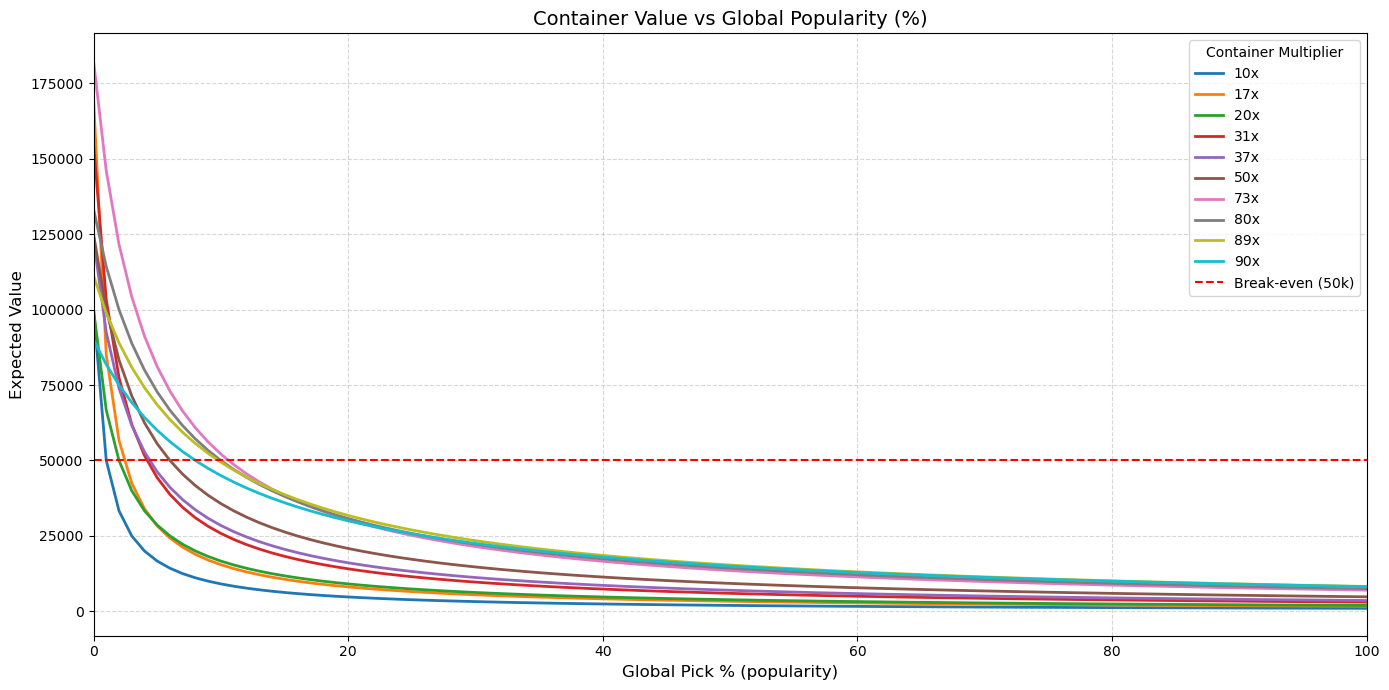

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

x_range = np.arange(0, 101, 1)

for col in df.columns[1:]:
    plt.plot(x_range, np.interp(x_range, df["Pick %"], df[col]), label=col, linewidth=2)

plt.axhline(y=50000, color='red', linestyle='--', linewidth=1.5, label='Break-even (50k)')

plt.xlabel("Global Pick % (popularity)", fontsize=12)
plt.ylabel("Expected Value", fontsize=12)
plt.title("Container Value vs Global Popularity (%)", fontsize=14)
plt.legend(title="Container Multiplier", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

### **Based on Discord**

In [ ]:
import pandas as pd

real_votes = {
    10: (1, 10),
    17: (1, 8),
    20: (2, 7),
    31: (2, 9),
    37: (3, 6),
    50: (4, 7),
    73: (4, 8),
    80: (6, 6),
    89: (8, 9),
    90: (10, 30)
}

base_treasure = 10000

rows = []
for multiplier, (inhabitants, pick_percent) in real_votes.items():
    value = (base_treasure * multiplier) / (inhabitants + pick_percent)
    rows.append({
        "multiplier": multiplier,
        "inhabitants": inhabitants,
        "pick_percent": pick_percent,
        "expected_value": value
    })

df_real = pd.DataFrame(rows).sort_values("expected_value", ascending=False)
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df_real)


   multiplier  inhabitants  pick_percent  expected_value
7          80            6             6       66,666.67
6          73            4             8       60,833.33
8          89            8             9       52,352.94
5          50            4             7       45,454.55
4          37            3             6       41,111.11
3          31            2             9       28,181.82
9          90           10            30       22,500.00
2          20            2             7       22,222.22
1          17            1             8       18,888.89
0          10            1            10        9,090.91


In [18]:
# Second try, new poll

import pandas as pd

real_votes = {
    10: (1, 16),
    17: (1, 10),
    20: (2, 4),
    31: (2, 5),
    37: (3, 2),
    50: (4, 5),
    73: (4, 22),
    80: (6, 15),
    89: (8, 7),
    90: (10, 15)
}

base_treasure = 10000

rows = []
for multiplier, (inhabitants, pick_percent) in real_votes.items():
    value = (base_treasure * multiplier) / (inhabitants + pick_percent)
    rows.append({
        "multiplier": multiplier,
        "inhabitants": inhabitants,
        "pick_percent": pick_percent,
        "expected_value": value
    })

df_real = pd.DataFrame(rows).sort_values("expected_value", ascending=False)
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df_real)

   multiplier  inhabitants  pick_percent  expected_value
4          37            3             2       74,000.00
8          89            8             7       59,333.33
5          50            4             5       55,555.56
3          31            2             5       44,285.71
7          80            6            15       38,095.24
9          90           10            15       36,000.00
2          20            2             4       33,333.33
6          73            4            22       28,076.92
1          17            1            10       15,454.55
0          10            1            16        5,882.35


In [19]:
real_votes = {
    10: (1, 13),
    17: (1, 9),
    20: (2, 5.5),
    31: (2, 7),
    37: (3, 4),
    50: (4, 6),
    73: (4, 15),
    80: (6, 10.5),
    89: (8, 8),
    90: (10, 22.5)
}

base_treasure = 10000

rows = []
for multiplier, (inhabitants, pick_percent) in real_votes.items():
    value = (base_treasure * multiplier) / (inhabitants + pick_percent)
    rows.append({
        "multiplier": multiplier,
        "inhabitants": inhabitants,
        "pick_percent": pick_percent,
        "expected_value": value
    })

df_real = pd.DataFrame(rows).sort_values("expected_value", ascending=False)
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df_real)

   multiplier  inhabitants  pick_percent  expected_value
8          89            8          8.00       55,625.00
4          37            3          4.00       52,857.14
5          50            4          6.00       50,000.00
7          80            6         10.50       48,484.85
6          73            4         15.00       38,421.05
3          31            2          7.00       34,444.44
9          90           10         22.50       27,692.31
2          20            2          5.50       26,666.67
1          17            1          9.00       17,000.00
0          10            1         13.00        7,142.86


# **Round 3**

In [8]:

p = ((320 - 290)/(320 - 285)) ** 3

p

0.629737609329446

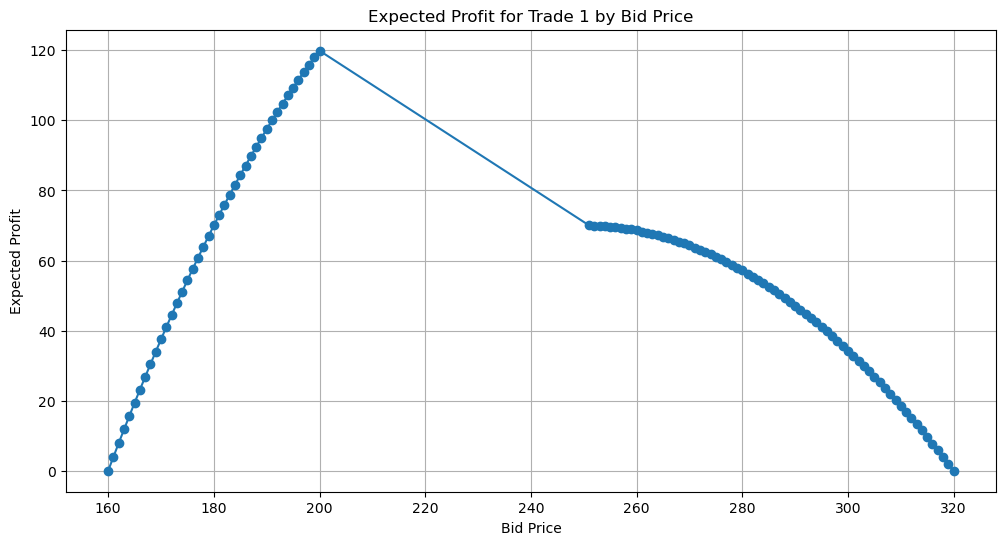

Optimal Bid for Trade 1: 200 with expected profit: 119.88


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_trade1_profit():
    prices_a = np.linspace(160, 200, 1000)  # Group A
    prices_b = np.linspace(250, 320, 1000)  # Group B
    resale_price = 320

    bid_range = list(range(160, 201)) + list(range(251, 321))
    results = []

    for bid in bid_range:
        # Win count for Group A (160–200)
        win_a = np.sum(prices_a < bid) / len(prices_a)

        # Win count for Group B (250–320)
        win_b = np.sum(prices_b < bid) / len(prices_b)

        # Expected profit per group
        profit_a = win_a * (resale_price - bid)
        profit_b = win_b * (resale_price - bid)

        total_profit = profit_a + profit_b
        results.append((bid, total_profit))

    return results

results = simulate_trade1_profit()

# Plot
bids, profits = zip(*results)
plt.figure(figsize=(12,6))
plt.plot(bids, profits, marker='o')
plt.title("Expected Profit for Trade 1 by Bid Price")
plt.xlabel("Bid Price")
plt.ylabel("Expected Profit")
plt.grid(True)
plt.show()

# Best bid
best_bid = max(results, key=lambda x: x[1])
print(f"Optimal Bid for Trade 1: {best_bid[0]} with expected profit: {best_bid[1]:.2f}")


In [2]:
320-250

70

In [40]:
70*0.05714285714285714

4.0

In [41]:
0.05714285714285714 *100

5.714285714285714